# Unit 10: Solutions to Analysing NMR Data from Start to Finish <a class='tocSkip'>
$$\require{mhchem}$$
    
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Author: Dr James Cumby   
Email: james.cumby@ed.ac.uk

## Overview

In this Unit, we will focus on handling real experimental results using Python, from the initial stage of importing data right through to fitting models and plotting the results.
While you could achieve this manually using Origin or Excel, hopefully you'll see that writing code makes the analysis easier, particularly when you have lots of data!
<div class="alert alert-info">
<b>
Note:</b> this session does not intend to teach new concepts, but may inadvertently introduce different ways of achieving the same results. Please ask me/a demonstrator if you unsure.
</div>

### Learning Objectives

This unit covers the learning outcomes of the entire course:
 - Perform numerical operations such as vector algebra and calculate simple statistics on data sets.
 - Write readable, well-documented and modular code.
 - Break a problem into logical steps, and use loops and decision operations to solve tasks.
 - Import and clean experimental data, and choose the appropriate variable types to hold information.
 - Fit models to numerical data, and plot the results in a number of different formats.


### Table of Contents
1. [The Problem](#problem)     
2. [Reading Data](#read)
3. [NMR data exploration](#explore)
4. [Peak hunting](#peak)
5. [Analysing Results](#analysis)


### Link to documentation:

- Documentation for `scipy.signal.find_peaks` can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)
- An overview of plotting with Pandas can be found [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. The Problem
<a id='problem'></a>
> Do you get more peaks in the <sup>1</sup>H NMR spectrum if you have an odd number of heteroatoms compared with an even number?

The information available is a CSV file containing the number of heteroatoms and an identifier for the molecules, and a folder of NMR data with the matching identifiers. You do not know the chemical formulae.

### Surveying the class
<img src="images/mentimeter_1.png" alt="isolated" width="400"/>

# Tasks

You will work in pairs or small groups to try and answer this question, with help and guidance from academic demonstrators. Don't worry if you can't immediately solve the problem - try out a few ideas, and ask for help when you're ready!

If you get stuck don't panic - you will be given hints throughout the workshop, and a model answer will be made available after the session.

<div class="alert alert-success">
<b>Task 1.1 Thinking about the problem</b>

In small groups, discuss the following:
- the chemistry behind the problem;
- what steps are required to solve the problem.

As you discuss your ideas, add steps to the mentimeter:
</div>

<img src="images/mentimeter_2.png" alt="isolated" width="400"/>

<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
Some ideas:
- Collect NMR data
- Collect information on hetero atoms
- most abundant isotopes of heteroatoms
</details>

<!-- begin silent_answer -->
## 2. Reading Data
<a id='read'></a>

<div class="alert alert-info">
<b>Data:    
</b>
You will find all the data you need to answer the question in the directory <code>data</code>. The summary file tells you about the hetero atom counts, the weights file about the molecular weights. In <code>data/NMR_data</code> you find many files with different spectra. 
</div>

### Task 2

<div class="alert alert-success">
<b>Getting started with the data</b>
    
1. Import the <code>NMR_summary.csv</code> file   
2. Work out how to read a single NMR spectrum from a file    
3. Write a function <code>read_NMR_data</code>that can read in all NMR files    
</div>
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 2.1 - Import summary file
First, we need to import the summary data file; here we'll use Pandas.
<!-- end silent_answer -->

In [1]:
!head data_sources/NMR_summary.csv


head: data_sources/NMR_summary.csv: No such file or directory


In [4]:
summary = pd.read_csv('data/NMR_summary.csv', sep=';')
summary.head()


,Molecule_ID,heteroatom_count
0,1,0
1,2,2
2,3,1
3,4,1
4,5,2


In [5]:
summary = summary.set_index('Molecule_ID')
summary.head()


,heteroatom_count
Molecule_ID,
1,0
2,2
3,1
4,1
5,2


<!-- begin silent_answer -->
### 2.2 - Read in NMR data file
First, we need to work out how to read one file
<!-- end silent_answer -->

In [6]:
NMR = pd.read_csv('data/NMR_data/1.txt', sep='\t', names=['a','b','c'])
NMR.head()


,a,b,c
0,13.796019,-0.050616,0.263138
1,13.795790,-0.057511,0.248825
2,13.795560,-0.047204,0.235817
3,13.795331,-0.030370,0.238590
4,13.795102,-0.023873,0.254259


In [12]:
NMR.plot(figsize=(10,6))


In [7]:
NMR = pd.read_csv('data/NMR_data/1.txt', sep='\t', names=['shift','intensity','derivative'])
NMR.head()


,shift,intensity,derivative
0,13.796019,-0.050616,0.263138
1,13.795790,-0.057511,0.248825
2,13.795560,-0.047204,0.235817
3,13.795331,-0.030370,0.238590
4,13.795102,-0.023873,0.254259


<AxesSubplot: xlabel='shift'>

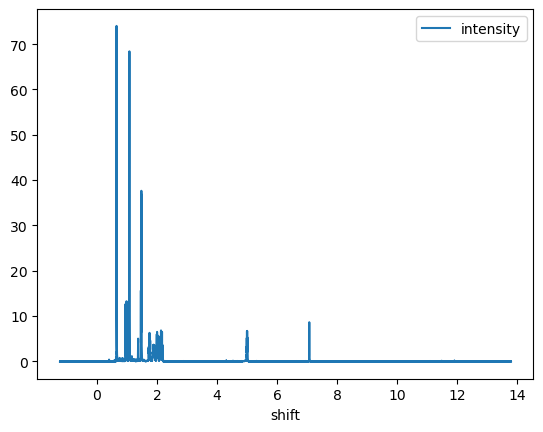

In [8]:
NMR.plot(x='shift', y='intensity')


<!-- begin silent_answer -->
### 2.3 - Read in all NMR files
Now we can read one file, we should write a function that can read them all.
<!-- end silent_answer -->

In [9]:
def read_NMR_data(NMR):
    """ Read NMR data. """

    data = pd.read_csv(NMR, sep='\t', names=['shift','intensity','derivative'])
    return data

read_NMR_data('data/NMR_data/10.txt')
    


,shift,intensity,derivative
0,14.202218,-0.064711,0.059473
1,14.201989,-0.066458,0.048571
2,14.201760,-0.056322,0.038129
3,14.201530,-0.040992,0.040142
4,14.201301,-0.034111,0.052170
...,...,...,...
65531,-0.826316,-0.058335,0.063376
65532,-0.826545,-0.066090,0.063032
65533,-0.826775,-0.070918,0.056772
65534,-0.827004,-0.069708,0.051623


In [10]:
NMR_data = {}
for ID in summary.index:
    NMR_file = 'data/NMR_data/' + str(ID) + '.txt'
    NMR_data[ID] = read_NMR_data(NMR_file)
    
NMR_data[11]


,shift,intensity,derivative
0,13.808344,-0.063278,0.077326
1,13.808115,-0.059682,0.071795
2,13.807885,-0.054798,0.070505
3,13.807656,-0.052117,0.071388
4,13.807427,-0.050141,0.071391
...,...,...,...
65531,-1.220190,-0.057293,0.056825
65532,-1.220420,-0.056044,0.069937
65533,-1.220649,-0.065017,0.077379
65534,-1.220878,-0.074770,0.075543


<!-- begin silent_answer -->
## 3. NMR data exploration
<a id='explore'></a>
To answer the problem
> Do you get more peaks in the <sup>1</sup>H NMR spectrum if you have an odd number of heteroatoms compared with an even number?

we will need to determine the number of peaks in a spectrum. 

<div class="alert alert-info">
<b>Questions to ask of the data</b>
    
To peak search automatically, we need the NMR data to have similar numerical values. Things to check are: 

- What range of chemical shift do they cover?
- What is the maximum intensity?
- How noisy is the baseline?
</div>
<!-- end silent_answer -->

<!-- begin silent_answer -->
## Task 3

<div class="alert alert-success">
<b>Exploring the data:</b>
    
1. Write a function that can quantify the following information:   
    - Range of chemical shifts   
    - Maximum intensity   
    - Level of noise in the spectrum background   
2. Extract and store these values for all NMR data    
3. Plot histograms of each of each parameter, and decide whether any corrections to the data are required   
4. Make any corrections required   
</div>
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 3.1/3.2 - Extract key features from each spectrum
<!-- end silent_answer -->

In [11]:

# Calculate shift range
min_shift = NMR_data[1]['shift'].min()
max_shift = NMR_data[1]['shift'].max()
shift_range = max_shift - min_shift

print( f"Spectrum covers {shift_range:.3f} ppm from {min_shift:.3f} to {max_shift:.3f} ppm.")

# Calculate max intensity
max_intensity = NMR_data[1]['intensity'].max()
print( f"Maximum intensity is {max_intensity:.3f}.")

# Calculate baseline
number_of_points = NMR_data[1].shape[0]
baseline_std = NMR_data[1]['intensity'].nsmallest(n = int(number_of_points*0.5)).std()
print( f"Baseline noise is {baseline_std:.3f}.")


Spectrum covers 15.029 ppm from -1.233 to 13.796 ppm.
Maximum intensity is 74.038.
Baseline noise is 0.016.


In [12]:
# Now, we convert the code above into a function that can work for any NMR DataFrame

def summary_statistics(NMR_data, ID):
    """ Return summary statistics for an NMR spectrum. """
    
    # Calculate shift range
    min_shift = NMR_data[ID]['shift'].min()
    max_shift = NMR_data[ID]['shift'].max()
    shift_range = max_shift - min_shift

    # Calculate max intensity
    max_intensity = NMR_data[ID]['intensity'].max()

    # Calculate baseline
    num_points = NMR_data[ID].shape[0]
    baseline_std = NMR_data[ID]['intensity'].nsmallest(n = int(num_points*0.5)).std()
    
    return shift_range, max_intensity, baseline_std

In [13]:
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_intensity', 'baseline_std']] = stats
    
summary.head()

,heteroatom_count,shift_range,max_intensity,baseline_std
Molecule_ID,,,,
1,0,15.029452,74.038383,0.016211
2,2,15.029452,39.278263,0.023142
3,1,15.029451,95.329765,0.018059
4,1,15.029451,22.837284,0.010094
5,2,15.029451,265.857788,0.013083


In [14]:
summary.describe()

,heteroatom_count,shift_range,max_intensity,baseline_std
count,58.000000,58.000000,58.000000,58.000000
mean,2.086207,15.126457,505.006272,0.029138
std,1.013669,0.738770,2500.020776,0.092283
min,0.000000,15.029451,17.880037,0.005242
25%,1.250000,15.029451,57.246149,0.013050
50%,2.000000,15.029452,134.940987,0.016268
75%,3.000000,15.029452,269.394150,0.020450
max,6.000000,20.655757,19181.949219,0.718201


<!-- begin silent_answer -->
### 3.3 - Plot histograms across all NMR data
<!-- end silent_answer -->

Text(0.5, 0, 'Chemical shift range')

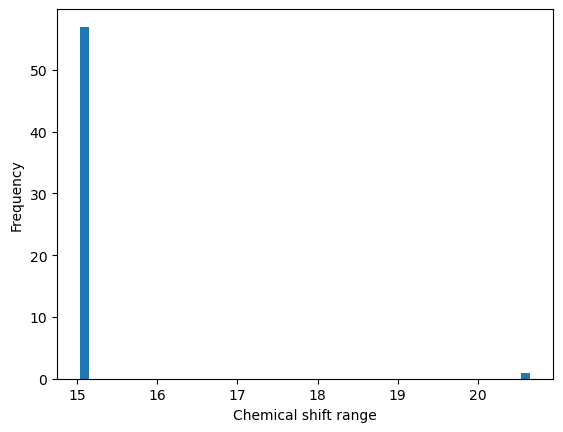

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
summary['shift_range'].plot(kind='hist', bins=50, ax=ax, label='ppm range')
ax.set_xlabel('Chemical shift range')


Text(0.5, 0, 'Maximum intensity')

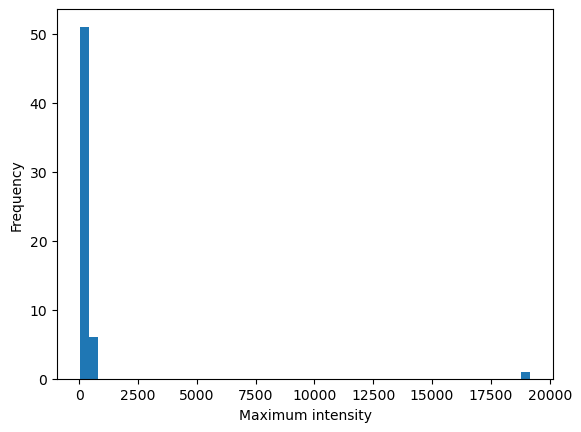

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
summary['max_intensity'].plot(kind='hist', bins=50, ax=ax, label='Maximum intensity')
ax.set_xlabel('Maximum intensity')

Text(0.5, 0, 'Baseline standard deviation')

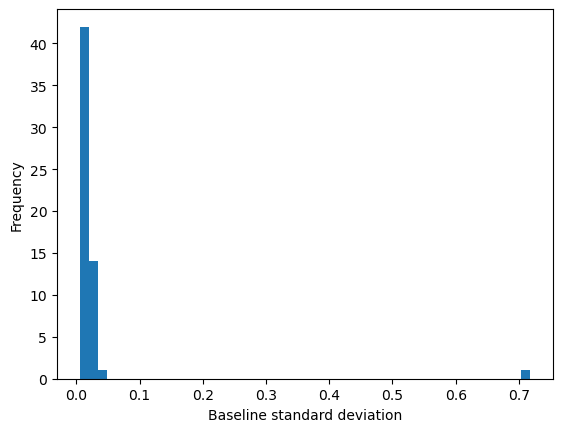

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')

<!-- begin silent_answer -->
### 3.4 - Apply corrections to standardise the data

For peak searching to work effectively, we need to standardise our data. The simplest change would be to normalise the intensity values so that, e.g. the maximum is 100.
<!-- end silent_answer -->

In [18]:
for ID in summary.index:
    NMR_data[ID]['intensity'] = NMR_data[ID]['intensity'] / NMR_data[ID]['intensity'].max() * 100


In [19]:
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_int', 'baseline_std']] = stats


Text(0.5, 0, 'Baseline standard deviation')

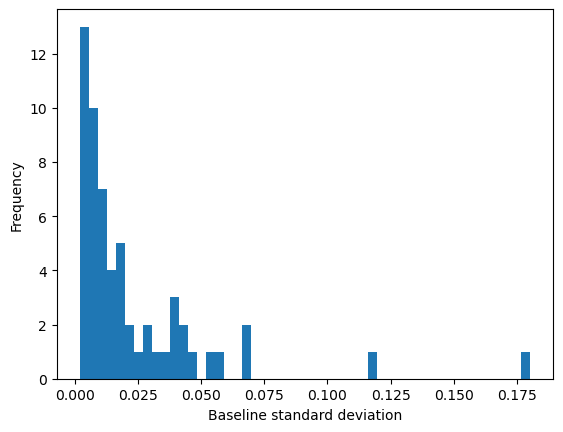

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')


<!-- begin silent_answer -->
## NMR peak hunting
<a id='peak'></a>
A number of different peak finding algorithms exist, but here we will focus on `scipy.signal.find_peaks` that you saw in unit 7. Use this to determine the number of peaks in each NMR spectrum, and store these values for plotting. We can optimise the peak finding using the `prominence` parameter (in this case; other problems might need different parameters).
<!-- end silent_answer -->

<!-- begin silent_answer -->
## Task 4

<div class="alert alert-success">
<b> Finding Peaks:</b>
    
1. Write a function capable of extracting peaks from any of the NMR spectra
2. Test how the peak-fitting parameters affect the number of peaks determined
    > Hint: "prominence" is particularly useful for these peak shapes
3. Optimise these parameter(s) to determine the number of peaks in each spectrum
</b>
</div>
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 4.1 - Function to extract peaks
<!-- end silent_answer -->

Text(0, 0.5, 'Normalised intensity')

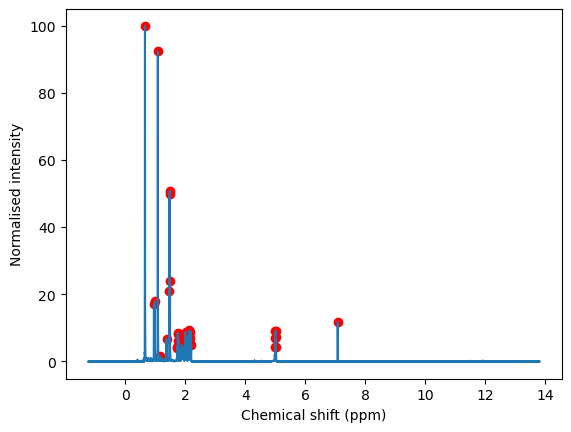

In [22]:
ID = 1
peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                              prominence = 1,
                             )


fig = plt.figure()
ax = fig.add_subplot()

ax.plot(NMR_data[ID]['shift'], NMR_data[ID]['intensity'])
ax.scatter(NMR_data[ID]['shift'][peaks],
           NMR_data[ID]['intensity'][peaks],
           color='r'
          )

ax.set_xlabel('Chemical shift (ppm)')
ax.set_ylabel('Normalised intensity')

#ax.set_xlim(7.3,8)
#ax.set_ylim(0,20)


In [23]:
def count_peaks(NMR_data, ID, prominence):
    """ Return the number of peaks in an NMR spectrum. """
    
    peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                                  prominence = prominence,
                                  )
    
    return len(peaks)

<!-- begin silent_answer -->
### 4.2 - Optimising the prominence parameter

To find peaks automatically we need to choose a prominence value. Let's systematically test a few different ones and see what the effect is on number of peaks. There are many ways to tackle this, but here we'll use the power of pandas to plot multiple curves quickly (and neatly)!
<!-- end silent_answer -->

In [24]:
prominence_range = np.arange(0.1, 5, 0.2)


# Make an empty DataFrame with 'prominence value' as the row index and 'ID' as the columns
prom_testing = pd.DataFrame(index=prominence_range, columns=summary.index)

for prom in prom_testing.index:
    for ID in prom_testing.columns:
        prom_testing.loc[prom, ID] = count_peaks(NMR_data, ID, prom)


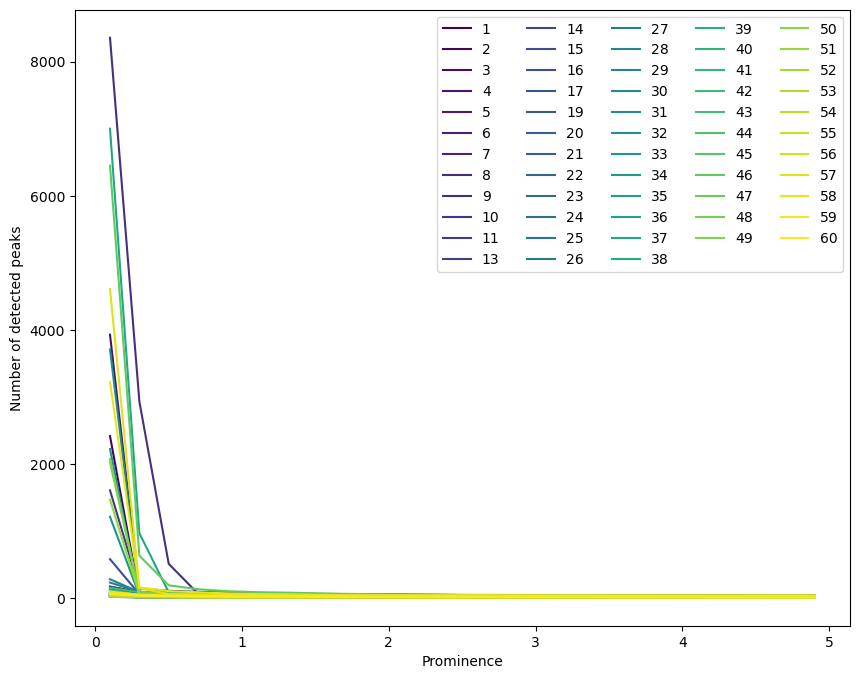

In [25]:
ax = prom_testing.plot(figsize=(10,8), colormap='viridis')
ax.set_xlabel('Prominence')
ax.set_ylabel('Number of detected peaks')
ax.legend(ncol=5)


<details><summary {style='color:green;font-weight:bold'}> Click here to see some discussion on the prominence parameter. </summary>
    
A prominence above ~1 seems to give a fairly constant number of peaks, but anything below this gives a number of peaks strongly dependent on this parameter.

We will choose prominence = 1 to avoid biasing the number of peaks in one spectrum over another. It is possible that we are missing some "real" peaks, but we are unlikely to do better in one spectrum than another.
    
</details>

<!-- begin silent_answer -->
### 4.3 - Optimise the parameters and extract peak count

<!-- end silent_answer -->

In [26]:
# Calculate number of peaks using optimum prominence value
for ID in summary.index:
    summary.loc[ID,'num_peaks'] = count_peaks(NMR_data, ID, prominence=1)


<!-- begin silent_answer -->
## 5. Analysing the results
<a id='analysis'></a>
Now we have computed the number of peaks, we can this for each spectrum in order to answer the original question.
<!-- end silent_answer -->

<!-- begin silent_answer -->
### Task 5
<div class="alert alert-success">
<b> Plotting:</b>
    
Plot graphs to determine whether the number of heteroatoms influences the number of NMR peaks.
</div>
<!-- end silent_answer -->

Text(0.5, 0.98, '')

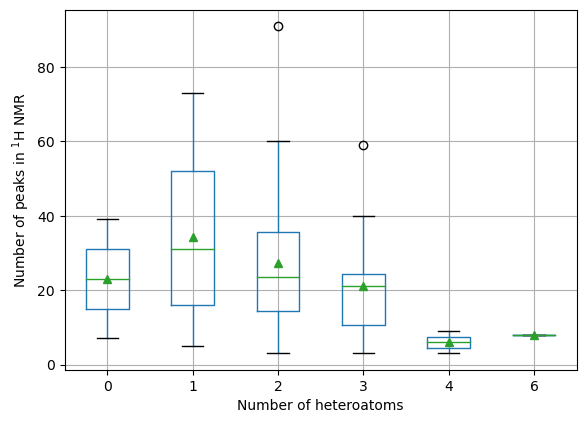

In [27]:
ax = summary.boxplot(column = 'num_peaks', by='heteroatom_count', showmeans=True)
ax.set_xlabel('Number of heteroatoms')
ax.set_ylabel('Number of peaks in $^1$H NMR')

# We need these lines to remove the additional "title" text
# (try commenting them to see what happens)
ax.set_title('')
ax.get_figure().suptitle('')

In [28]:
summary['even_heteroatoms'] = (summary['heteroatom_count'] % 2) == 0


Text(0.5, 0.98, '')

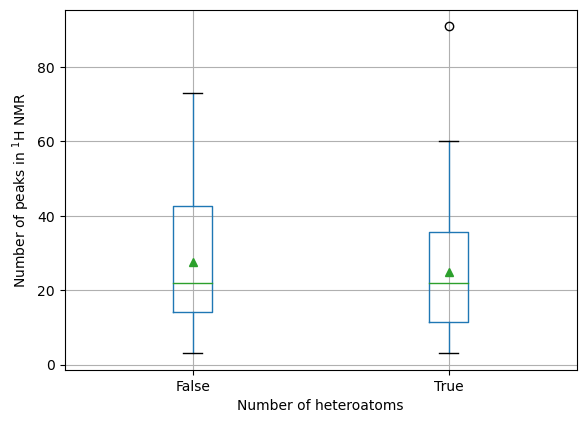

In [29]:
ax = summary.boxplot(column = 'num_peaks', by='even_heteroatoms', showmeans=True)
ax.set_xlabel('Number of heteroatoms')
ax.set_ylabel('Number of peaks in $^1$H NMR')

# We need these lines to remove the additional "title" text
# (try commenting them to see what happens)
ax.set_title('')
ax.get_figure().suptitle('')


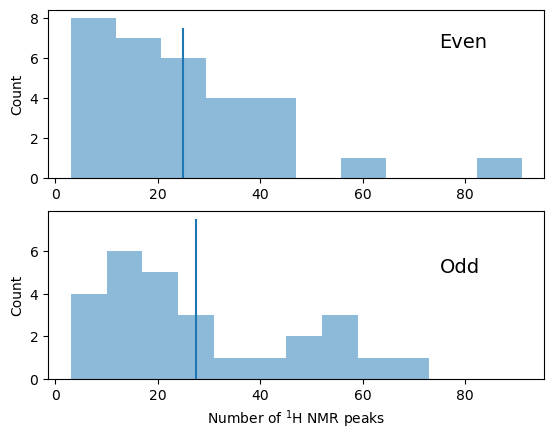

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
ax1.hist(summary[summary['even_heteroatoms']]['num_peaks'], alpha=0.5)
ax2.hist(summary[~summary['even_heteroatoms']]['num_peaks'], alpha=0.5)

ax2.set_xlabel('Number of $^1$H NMR peaks')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

ax1.text(75,6.5, 'Even', fontsize=14)
ax2.text(75,5, 'Odd', fontsize=14)

ax1.vlines(summary[summary['even_heteroatoms']]['num_peaks'].mean(), 0, 7.5)
ax2.vlines(summary[~summary['even_heteroatoms']]['num_peaks'].mean(), 0, 7.5)


<!-- begin silent_answer -->
# Conclusions
<div class="alert alert-info">
<b>
Key points:</b>
    
- The number of <sup>1</sup>H NMR peaks appears to decrease with increasing numbers of heteratoms   
    - This may just be due to a smaller number of compounds in this range   
- Molecules with one heteroatom show the highest number of NMR peaks on average
- Comparing odd with even numbers of heteratoms, there is little evidence from these data of any difference
    - Further work would be to apply statistical testing on these distributions, ideally using a greater number of measurements.</div>
<!-- end silent_answer -->

# Tasks to complete after this session

- Read through the notebook with answers, and check that you have understood the steps
- Find and read the documentation for any Python commands you are less familiar with
- Think about other ways to solve the problem, and try to implement/compare them
- Extend your analysis to explore other peak searching approaches (or parameters)
- Use statistical methods you have learned to quantify any correlations we have observed

## END UNIT 10

---